In [1]:
%load_ext autoreload
%autoreload 2

### Dataset

In [2]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

### Features

In [ ]:
import cvtda.pipelines

greyscale_to_features = cvtda.pipelines.GreyscaleToFeatures(
    dump_directory = "8"
)
train_features = greyscale_to_features.fit_transform(train_images, "train")
test_features = greyscale_to_features.transform(test_images, "test")

> Filtrations
Fitting the binarizer


Fitting the filtrations: 100%|██████████| 38/38 [00:00<00:00, 2922.81it/s]


Fitting complete
Got the result from 8/train\filtrations.npy
Fitting the persistence
Fitting complete
Got the result from 8/train\filtration_diagrams.npy
> Filtration features
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:19<00:00,  6.44s/it]


Fitting complete
Got the result from 8/train\filtration_features.npy
> Point clouds
Fitting the binarizer
Fitting the converter
Fitting image_to_point_cloud
Fitting complete
Applying the binarizer


Converting images to point clouds: 100%|██████████| 60000/60000 [00:00<00:00, 62304.74it/s]


Converting binary to point clouds


Combining the point clouds:   0%|          | 0/60000 [00:00<?, ?it/s]

Fitting the persistence
Fitting complete
Calculating the persistence
Saving the result to 8/train\pointclouds_diagrams.npy
> Point cloud features
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:09<00:00,  4.86s/it]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:16<00:00,  5.53s/it]


Fitting complete


Batch:   0%|          | 0/469 [00:00<?, ?it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Batch: 100%|██████████| 469/469 [05:34<00:00,  1.40it/s]


Saving the result to 8/train\pointclouds_features.npy
> Filtrations
Got the result from 8/train\filtrations.npy
Got the result from 8/train\filtration_diagrams.npy
> Filtration features
Got the result from 8/train\filtration_features.npy
> Point clouds
Applying the binarizer


Converting images to point clouds: 100%|██████████| 60000/60000 [00:01<00:00, 56171.12it/s]


Converting binary to point clouds


Combining the point clouds:   0%|          | 0/60000 [00:00<?, ?it/s]

Got the result from 8/train\pointclouds_diagrams.npy
> Point cloud features
Got the result from 8/train\pointclouds_features.npy
> Filtrations
Got the result from 8/test\filtrations.npy
Got the result from 8/test\filtration_diagrams.npy
> Filtration features


Batch: 100%|██████████| 96/96 [01:04<00:00,  1.49it/s]


Saving the result to 8/test\filtration_features.npy
> Point clouds
Applying the binarizer


Converting images to point clouds: 100%|██████████| 10000/10000 [00:00<00:00, 61376.23it/s]


Converting binary to point clouds


Combining the point clouds:   0%|          | 0/10000 [00:00<?, ?it/s]

Calculating the persistence
Saving the result to 8/test\pointclouds_diagrams.npy
> Point cloud features


Batch: 100%|██████████| 79/79 [00:54<00:00,  1.46it/s]


Saving the result to 8/test\pointclouds_features.npy


In [21]:
train_features = numpy.minimum(train_features, 150000)
test_features = numpy.minimum(test_features, 150000)

### Classify raw features

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000021642F751B0>
Input to LazyLinear: 21608
Parameters: 5618634


100%|██████████| 50/50 [02:38<00:00,  3.17s/it, loss=8.89e+4]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)


d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Fitting <catboost.core.CatBoostClassifier object at 0x0000021642F750C0>


Learning rate set to 0.321004
0:	learn: 1.5129417	total: 413ms	remaining: 2m 44s
1:	learn: 1.1577844	total: 600ms	remaining: 1m 59s
2:	learn: 0.9257694	total: 820ms	remaining: 1m 48s
3:	learn: 0.7859202	total: 1.03s	remaining: 1m 42s
4:	learn: 0.6841521	total: 1.25s	remaining: 1m 38s
5:	learn: 0.6005646	total: 1.47s	remaining: 1m 36s
6:	learn: 0.5293271	total: 1.71s	remaining: 1m 35s
7:	learn: 0.4918057	total: 1.9s	remaining: 1m 33s
8:	learn: 0.4535267	total: 2.1s	remaining: 1m 31s
9:	learn: 0.4144800	total: 2.35s	remaining: 1m 31s
10:	learn: 0.3847237	total: 2.57s	remaining: 1m 30s
11:	learn: 0.3602741	total: 2.8s	remaining: 1m 30s
12:	learn: 0.3395595	total: 3.01s	remaining: 1m 29s
13:	learn: 0.3232683	total: 3.21s	remaining: 1m 28s
14:	learn: 0.3010841	total: 3.41s	remaining: 1m 27s
15:	learn: 0.2905510	total: 3.6s	remaining: 1m 26s
16:	learn: 0.2821179	total: 3.76s	remaining: 1m 24s
17:	learn: 0.2703879	total: 3.97s	remaining: 1m 24s
18:	learn: 0.2639332	total: 4.16s	remaining: 1m 

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.8622,0.9457,0.9716,0.9841,0.9895,0.9938,0.9965,0.9981,0.9991,0.987436,0.861230,0.860519,0.860422
1,RandomForestClassifier,0.9689,0.9892,0.9951,0.9974,0.9981,0.9990,0.9996,0.9999,1.0000,0.999106,0.968812,0.968647,0.968709
2,NNClassifier,0.9796,0.9934,0.9967,0.9977,0.9985,0.9991,0.9994,0.9997,0.9999,0.999005,0.979660,0.979387,0.979502
3,HistGradientBoostingClassifier,0.9581,0.9843,0.9929,0.9964,0.9979,0.9986,0.9991,0.9997,0.9999,0.998507,0.957896,0.957790,0.957754
4,XGBClassifier,0.9692,0.9906,0.9962,0.9976,0.9987,0.9994,0.9996,0.9997,1.0000,0.999226,0.969043,0.968929,0.968952
5,CatBoostClassifier,0.9722,0.9926,0.9971,0.9987,0.9995,0.9998,0.9998,0.9999,0.9999,0.999417,0.972069,0.971996,0.972029


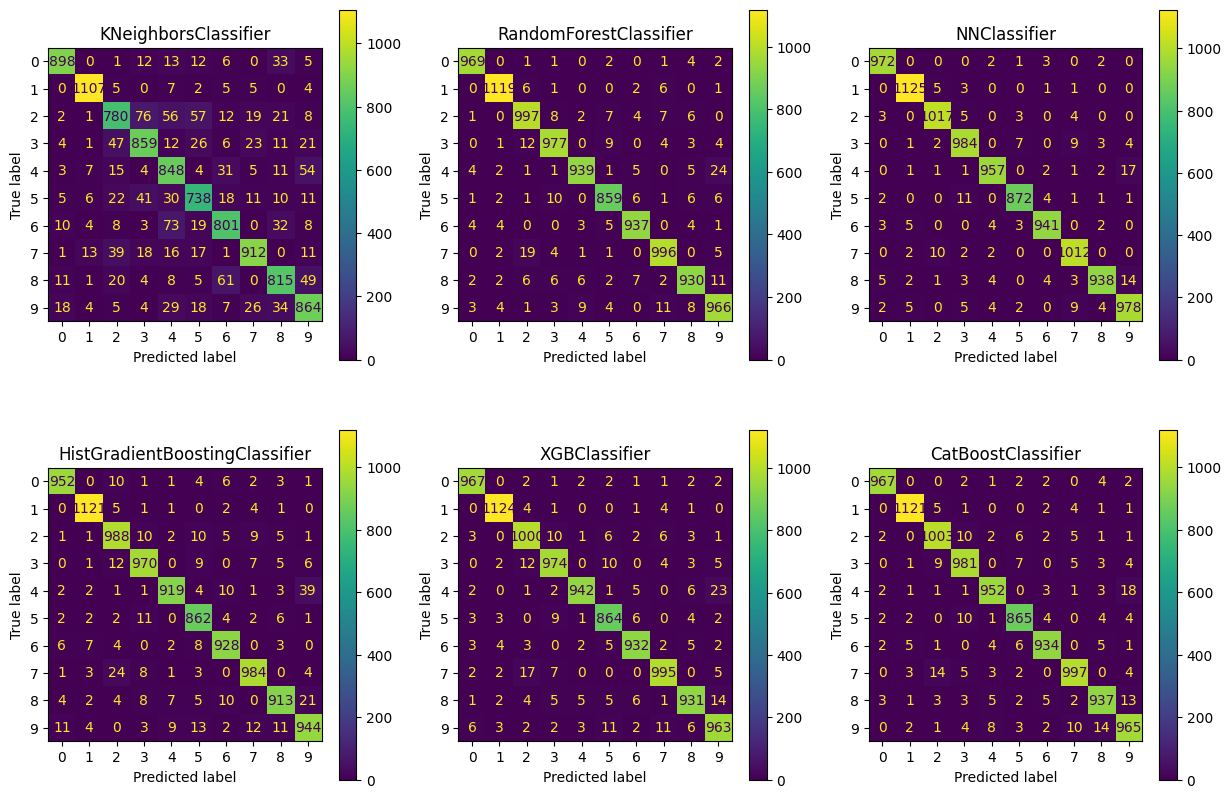

In [25]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### StandardScaler

In [26]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((60000, 10920), (10000, 10920))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000002164FA3AE30>
Input to LazyLinear: 21608
Parameters: 5618634


100%|██████████| 25/25 [01:53<00:00,  4.54s/it, loss=8.85e+4, val_acc=0.981]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
Fitting <catboost.core.CatBoostClassifier object at 0x000002164FA3B490>


Learning rate set to 0.321004
0:	learn: 1.5129417	total: 304ms	remaining: 2m 1s
1:	learn: 1.1577837	total: 491ms	remaining: 1m 37s
2:	learn: 0.9257693	total: 708ms	remaining: 1m 33s
3:	learn: 0.7859201	total: 922ms	remaining: 1m 31s
4:	learn: 0.6841521	total: 1.14s	remaining: 1m 30s
5:	learn: 0.6005646	total: 1.35s	remaining: 1m 28s
6:	learn: 0.5293271	total: 1.59s	remaining: 1m 29s
7:	learn: 0.4918058	total: 1.78s	remaining: 1m 27s
8:	learn: 0.4535267	total: 1.99s	remaining: 1m 26s
9:	learn: 0.4144801	total: 2.23s	remaining: 1m 27s
10:	learn: 0.3847237	total: 2.45s	remaining: 1m 26s
11:	learn: 0.3602741	total: 2.68s	remaining: 1m 26s
12:	learn: 0.3395595	total: 2.88s	remaining: 1m 25s
13:	learn: 0.3232682	total: 3.08s	remaining: 1m 25s
14:	learn: 0.3010841	total: 3.29s	remaining: 1m 24s
15:	learn: 0.2905510	total: 3.47s	remaining: 1m 23s
16:	learn: 0.2821179	total: 3.64s	remaining: 1m 21s
17:	learn: 0.2703879	total: 3.85s	remaining: 1m 21s
18:	learn: 0.2639332	total: 4.03s	remaining: 

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9274,0.9738,0.9872,0.9929,0.9957,0.9973,0.9983,0.9988,0.9993,0.995743,0.929201,0.926507,0.926793
1,RandomForestClassifier,0.9687,0.9901,0.9954,0.9975,0.9983,0.9989,0.9991,0.9997,0.9998,0.998967,0.968637,0.968448,0.968521
2,NNClassifier,0.9809,0.9930,0.9961,0.9977,0.9985,0.9991,0.9994,0.9996,0.9999,0.999209,0.980801,0.980725,0.980741
3,HistGradientBoostingClassifier,0.9589,0.9840,0.9935,0.9958,0.9975,0.9982,0.9989,0.9995,0.9999,0.998546,0.958657,0.958555,0.958521
4,XGBClassifier,0.9707,0.9905,0.9952,0.9974,0.9984,0.9993,0.9996,0.9998,1.0000,0.999230,0.970524,0.970443,0.970463
5,CatBoostClassifier,0.9740,0.9927,0.9971,0.9989,0.9992,0.9997,0.9998,0.9999,1.0000,0.999466,0.973904,0.973771,0.973829


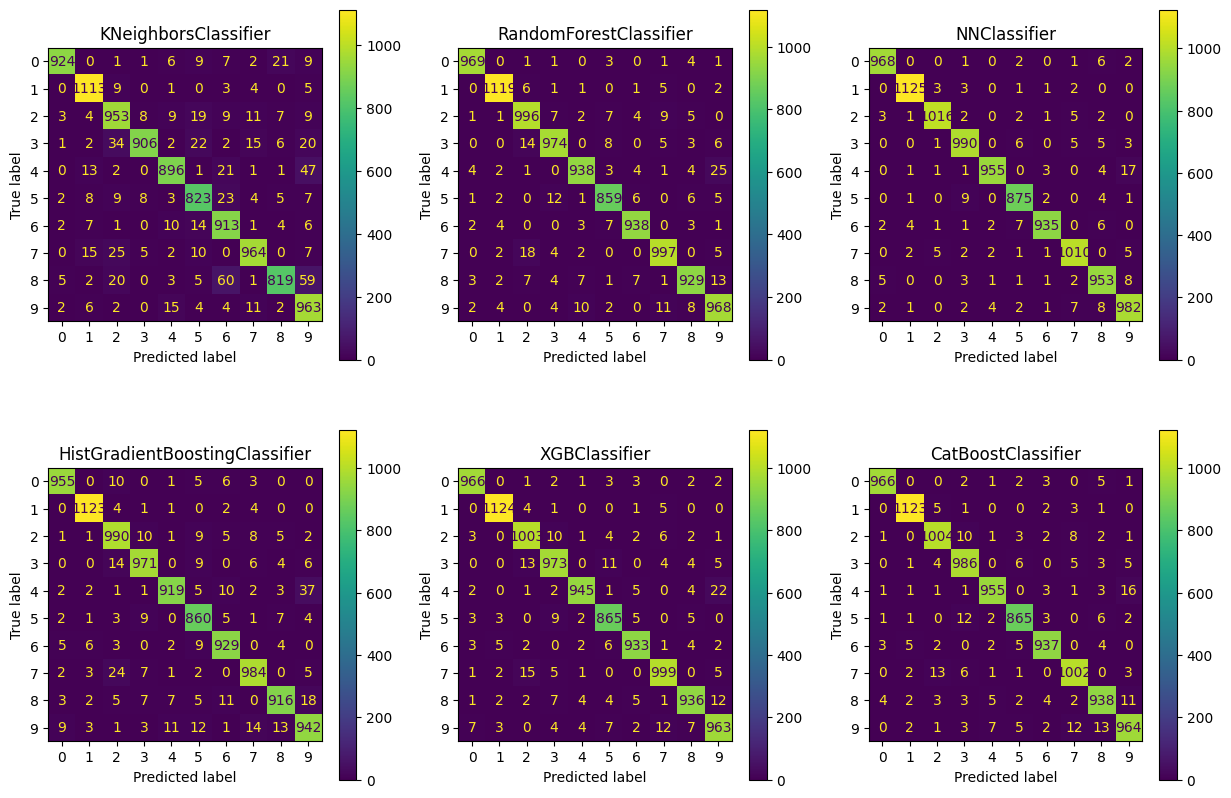

In [27]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### VarianceThreshold & DuplicatesRemover

In [28]:
import sklearn.feature_selection

variance_threshold = sklearn.feature_selection.VarianceThreshold(threshold = 1e-8)
train_features = variance_threshold.fit_transform(train_features)
test_features = variance_threshold.transform(test_features)

train_features.shape, test_features.shape

((60000, 9788), (10000, 9788))

In [29]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

100%|██████████| 5861/5861 [00:13<00:00, 436.04it/s] 


Found 4189 duplicates


((60000, 5599), (10000, 5599))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000021651963CA0>
Input to LazyLinear: 10975
Parameters: 2896586


100%|██████████| 25/25 [03:43<00:00,  8.92s/it, loss=8.89e+4, val_acc=0.976]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
Fitting <catboost.core.CatBoostClassifier object at 0x0000021651963E20>


Learning rate set to 0.321004
0:	learn: 1.5129414	total: 230ms	remaining: 1m 31s
1:	learn: 1.1577842	total: 378ms	remaining: 1m 15s
2:	learn: 0.9257693	total: 528ms	remaining: 1m 9s
3:	learn: 0.7859200	total: 673ms	remaining: 1m 6s
4:	learn: 0.6841521	total: 826ms	remaining: 1m 5s
5:	learn: 0.6005646	total: 971ms	remaining: 1m 3s
6:	learn: 0.5293271	total: 1.13s	remaining: 1m 3s
7:	learn: 0.4918058	total: 1.26s	remaining: 1m 1s
8:	learn: 0.4535267	total: 1.4s	remaining: 1m
9:	learn: 0.4144800	total: 1.57s	remaining: 1m 1s
10:	learn: 0.3847237	total: 1.71s	remaining: 1m
11:	learn: 0.3602741	total: 1.86s	remaining: 1m
12:	learn: 0.3395595	total: 2s	remaining: 59.5s
13:	learn: 0.3232683	total: 2.13s	remaining: 58.8s
14:	learn: 0.3010841	total: 2.27s	remaining: 58.3s
15:	learn: 0.2905510	total: 2.39s	remaining: 57.5s
16:	learn: 0.2821179	total: 2.5s	remaining: 56.4s
17:	learn: 0.2703880	total: 2.64s	remaining: 56.1s
18:	learn: 0.2639332	total: 2.76s	remaining: 55.4s
19:	learn: 0.2519466	to

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9272,0.9742,0.9872,0.9933,0.9960,0.9974,0.9981,0.9986,0.9993,0.995939,0.929114,0.926315,0.926601
1,RandomForestClassifier,0.9683,0.9896,0.9954,0.9976,0.9986,0.9990,0.9998,0.9998,1.0000,0.999199,0.968196,0.968031,0.968090
2,NNClassifier,0.9764,0.9921,0.9958,0.9978,0.9984,0.9991,0.9993,0.9996,0.9997,0.998967,0.976377,0.976184,0.976249
3,HistGradientBoostingClassifier,0.9583,0.9858,0.9933,0.9960,0.9973,0.9984,0.9991,0.9997,0.9999,0.998521,0.958174,0.957914,0.957963
4,XGBClassifier,0.9701,0.9902,0.9956,0.9975,0.9987,0.9994,0.9996,0.9998,1.0000,0.999204,0.969938,0.969817,0.969854
5,CatBoostClassifier,0.9742,0.9929,0.9976,0.9987,0.9992,0.9998,0.9999,0.9999,1.0000,0.999436,0.974050,0.973982,0.974011


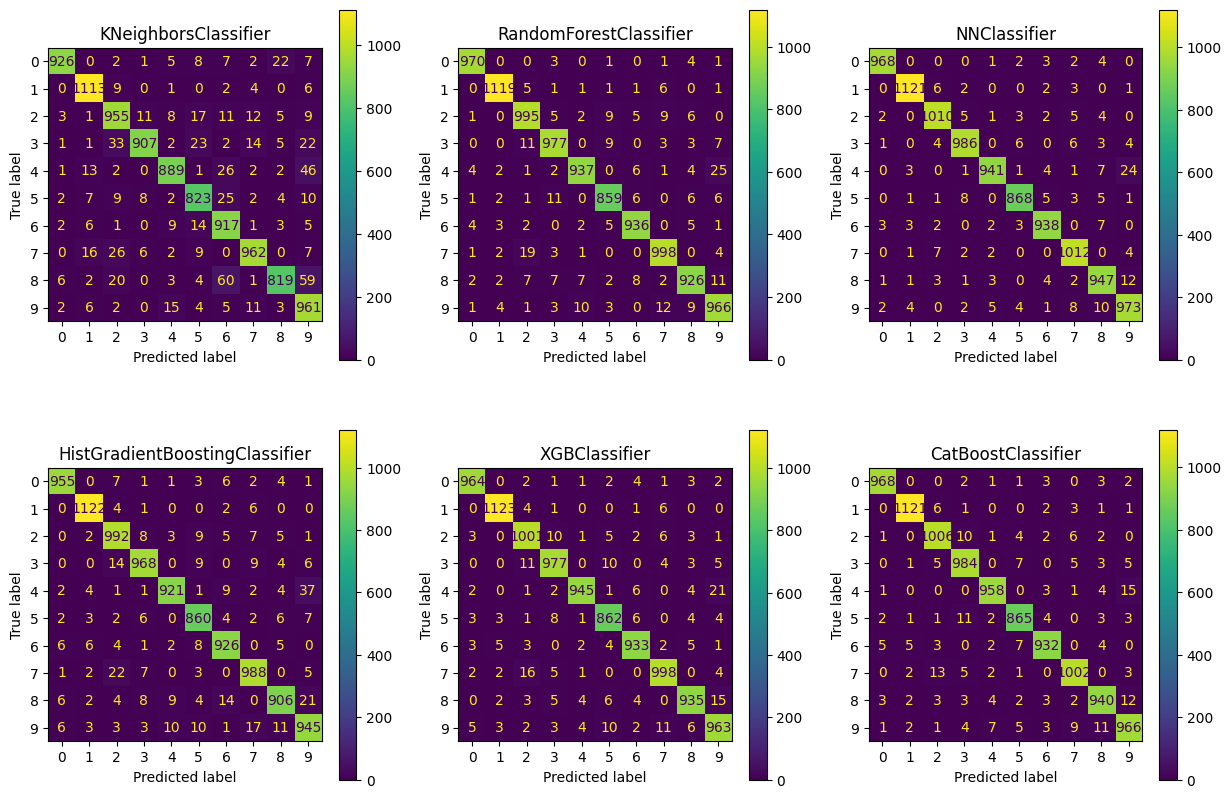

In [30]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### InformationValueFeatureSelector

Fitting the information value feature selector


information values: 100%|██████████| 5599/5599 [00:59<00:00, 94.47it/s] 


Fitting complete


((60000, 4187), (10000, 4187))

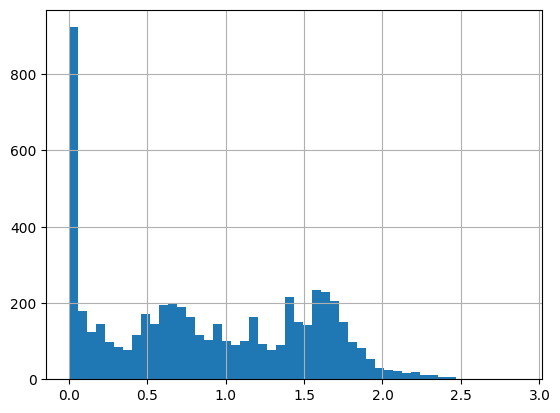

In [31]:
import cvtda.classification

feature_selector = cvtda.classification.InformationValueFeatureSelector(threshold = 0.25, bins = 50)

train_features = feature_selector.fit_transform(train_features, train_labels)
test_features = feature_selector.transform(test_features)

feature_selector.hist()

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x00000217A554A980>
Input to LazyLinear: 8219
Parameters: 2191050


100%|██████████| 25/25 [03:03<00:00,  7.35s/it, loss=8.89e+4, val_acc=0.978]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
Fitting <catboost.core.CatBoostClassifier object at 0x00000217A554A770>


Learning rate set to 0.321004
0:	learn: 1.5129418	total: 196ms	remaining: 1m 18s
1:	learn: 1.1577841	total: 300ms	remaining: 59.6s
2:	learn: 0.9257695	total: 417ms	remaining: 55.2s
3:	learn: 0.7859201	total: 530ms	remaining: 52.5s
4:	learn: 0.6841521	total: 647ms	remaining: 51.1s
5:	learn: 0.6005646	total: 759ms	remaining: 49.9s
6:	learn: 0.5293271	total: 885ms	remaining: 49.7s
7:	learn: 0.4918057	total: 986ms	remaining: 48.3s
8:	learn: 0.4535267	total: 1.09s	remaining: 47.6s
9:	learn: 0.4144800	total: 1.23s	remaining: 47.9s
10:	learn: 0.3847236	total: 1.34s	remaining: 47.5s
11:	learn: 0.3602741	total: 1.47s	remaining: 47.4s
12:	learn: 0.3395594	total: 1.57s	remaining: 46.9s
13:	learn: 0.3232682	total: 1.68s	remaining: 46.4s
14:	learn: 0.3010842	total: 1.79s	remaining: 46s
15:	learn: 0.2905510	total: 1.89s	remaining: 45.3s
16:	learn: 0.2821179	total: 1.98s	remaining: 44.6s
17:	learn: 0.2703880	total: 2.09s	remaining: 44.4s
18:	learn: 0.2639333	total: 2.19s	remaining: 43.8s
19:	learn: 0

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9346,0.9786,0.9902,0.9940,0.9963,0.9976,0.9982,0.9986,0.9994,0.996237,0.935895,0.933889,0.934148
1,RandomForestClassifier,0.9687,0.9903,0.9956,0.9973,0.9982,0.9989,0.9996,0.9997,1.0000,0.999081,0.968569,0.968435,0.968478
2,NNClassifier,0.9778,0.9929,0.9961,0.9983,0.9989,0.9992,0.9996,0.9998,1.0000,0.999234,0.977749,0.977622,0.977668
3,HistGradientBoostingClassifier,0.9572,0.9847,0.9941,0.9963,0.9979,0.9987,0.9991,0.9995,0.9999,0.998515,0.957126,0.956784,0.956864
4,XGBClassifier,0.9683,0.9910,0.9956,0.9970,0.9985,0.9990,0.9994,0.9998,1.0000,0.999186,0.968092,0.968010,0.968021
5,CatBoostClassifier,0.9728,0.9930,0.9969,0.9983,0.9996,0.9997,0.9999,0.9999,0.9999,0.999406,0.972665,0.972609,0.972632


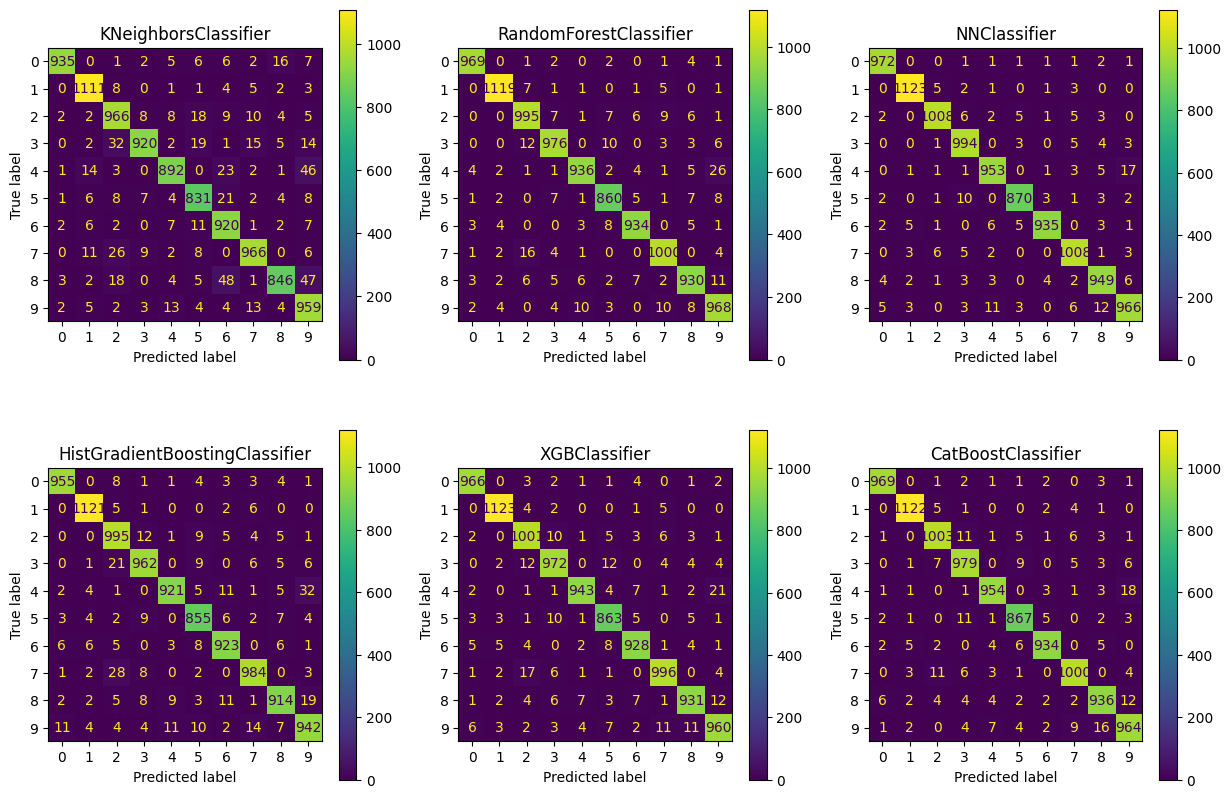

In [32]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### CorrelationSelector

((60000, 2432), (10000, 2432))

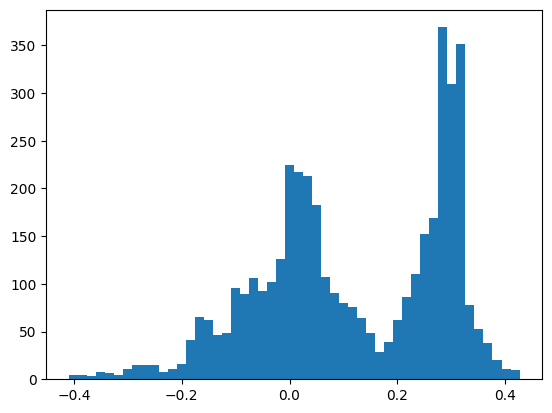

In [36]:
correlation_selector = cvtda.classification.CorrelationSelector(threshold = 0.05)

train_features = correlation_selector.fit_transform(train_features, train_labels)
test_features = correlation_selector.transform(test_features)

correlation_selector.hist()

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000002164FA08F70>
Input to LazyLinear: 4672
Parameters: 1283018


100%|██████████| 25/25 [02:05<00:00,  5.04s/it, loss=9.02e+4, val_acc=0.966]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
Fitting <catboost.core.CatBoostClassifier object at 0x000002164FA08850>


Learning rate set to 0.321004
0:	learn: 1.5129415	total: 69.6ms	remaining: 27.8s
1:	learn: 1.1366431	total: 131ms	remaining: 26.1s
2:	learn: 0.9093372	total: 205ms	remaining: 27.1s
3:	learn: 0.8106883	total: 266ms	remaining: 26.3s
4:	learn: 0.7136846	total: 335ms	remaining: 26.5s
5:	learn: 0.6450646	total: 405ms	remaining: 26.6s
6:	learn: 0.5761403	total: 474ms	remaining: 26.6s
7:	learn: 0.5265543	total: 543ms	remaining: 26.6s
8:	learn: 0.4941980	total: 607ms	remaining: 26.4s
9:	learn: 0.4552477	total: 678ms	remaining: 26.4s
10:	learn: 0.4228085	total: 754ms	remaining: 26.7s
11:	learn: 0.4017297	total: 823ms	remaining: 26.6s
12:	learn: 0.3861858	total: 883ms	remaining: 26.3s
13:	learn: 0.3699259	total: 947ms	remaining: 26.1s
14:	learn: 0.3513906	total: 1.01s	remaining: 26.1s
15:	learn: 0.3411950	total: 1.07s	remaining: 25.7s
16:	learn: 0.3315286	total: 1.14s	remaining: 25.6s
17:	learn: 0.3180128	total: 1.21s	remaining: 25.6s
18:	learn: 0.3040526	total: 1.27s	remaining: 25.5s
19:	learn:

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9126,0.9686,0.9864,0.9924,0.9950,0.9972,0.9980,0.9989,0.9996,0.993494,0.913667,0.912232,0.912079
1,RandomForestClassifier,0.9600,0.9846,0.9925,0.9961,0.9976,0.9989,0.9994,0.9996,0.9997,0.998389,0.959901,0.959689,0.959762
2,NNClassifier,0.9659,0.9875,0.9935,0.9968,0.9980,0.9989,0.9991,0.9994,0.9998,0.998300,0.965766,0.965631,0.965640
3,HistGradientBoostingClassifier,0.9440,0.9788,0.9896,0.9942,0.9966,0.9977,0.9987,0.9991,0.9995,0.997385,0.943838,0.943559,0.943609
4,XGBClassifier,0.9594,0.9860,0.9932,0.9962,0.9977,0.9988,0.9993,0.9997,1.0000,0.998803,0.959207,0.959086,0.959090
5,CatBoostClassifier,0.9675,0.9889,0.9952,0.9974,0.9992,0.9997,1.0000,1.0000,1.0000,0.999118,0.967216,0.967237,0.967211


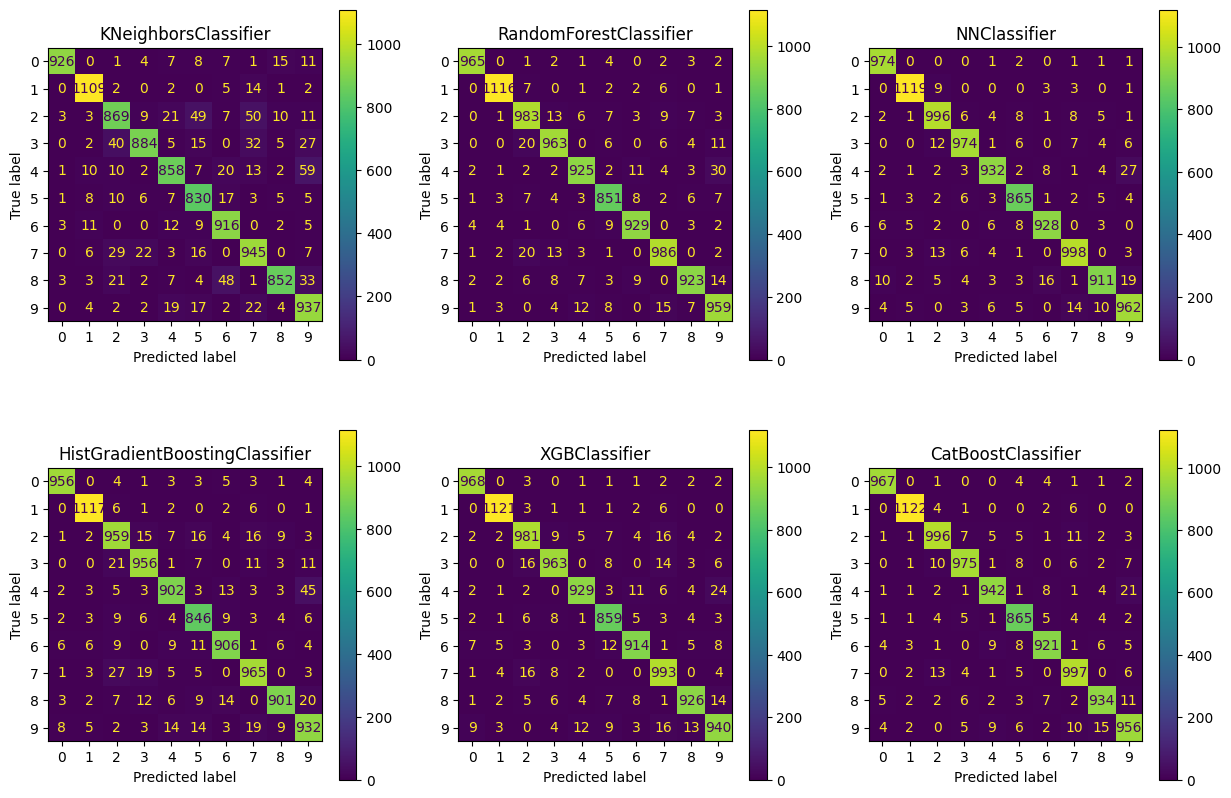

In [35]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### PCA

In [40]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components = 64, random_state = 42)

train_features = pca.fit_transform(train_features)
print('Explained variance', round(pca.explained_variance_ratio_.sum(), 2))
print([ round(x, 3) for x in pca.explained_variance_ratio_ ])

test_features = pca.transform(test_features)

train_features.shape, test_features.shape

Explained variance 0.97
[0.62, 0.074, 0.064, 0.041, 0.024, 0.014, 0.012, 0.01, 0.01, 0.008, 0.006, 0.006, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0]


((60000, 64), (10000, 64))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x00000217AC493D00>
Input to LazyLinear: 64
Parameters: 61162


100%|██████████| 25/25 [00:43<00:00,  1.75s/it, loss=9.93e+4, val_acc=0.907]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
Fitting <catboost.core.CatBoostClassifier object at 0x00000217AC493B50>
Learning rate set to 0.321004
0:	lear

4:	learn: 0.9190446	total: 35ms	remaining: 2.76s
5:	learn: 0.8596514	total: 40.6ms	remaining: 2.67s
6:	learn: 0.8216705	total: 46.5ms	remaining: 2.61s
7:	learn: 0.7801922	total: 52.1ms	remaining: 2.56s
8:	learn: 0.7401803	total: 58.6ms	remaining: 2.55s
9:	learn: 0.7073601	total: 64.2ms	remaining: 2.5s
10:	learn: 0.6822353	total: 70.6ms	remaining: 2.5s
11:	learn: 0.6576147	total: 77.1ms	remaining: 2.49s
12:	learn: 0.6372338	total: 83.1ms	remaining: 2.48s
13:	learn: 0.6171206	total: 89.6ms	remaining: 2.47s
14:	learn: 0.5962452	total: 95.5ms	remaining: 2.45s
15:	learn: 0.5829435	total: 102ms	remaining: 2.44s
16:	learn: 0.5682598	total: 107ms	remaining: 2.42s
17:	learn: 0.5526232	total: 114ms	remaining: 2.42s
18:	learn: 0.5427541	total: 120ms	remaining: 2.42s
19:	learn: 0.5309607	total: 125ms	remaining: 2.38s
20:	learn: 0.5155336	total: 131ms	remaining: 2.37s
21:	learn: 0.5031761	total: 137ms	remaining: 2.36s
22:	learn: 0.4896084	total: 143ms	remaining: 2.35s
23:	learn: 0.4777562	total: 15

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9096,0.9673,0.9854,0.9921,0.9953,0.9974,0.9981,0.9988,0.9997,0.993352,0.910061,0.909348,0.908988
1,RandomForestClassifier,0.9248,0.9704,0.9853,0.9920,0.9948,0.9968,0.9981,0.9993,0.9998,0.995033,0.924511,0.924453,0.924328
2,NNClassifier,0.9073,0.9558,0.9723,0.9820,0.9867,0.9926,0.9963,0.9979,0.9988,0.991219,0.908619,0.906782,0.906877
3,HistGradientBoostingClassifier,0.8740,0.9418,0.9669,0.9789,0.9856,0.9917,0.9960,0.9986,0.9996,0.987700,0.874021,0.873482,0.872659
4,XGBClassifier,0.9112,0.9671,0.9831,0.9901,0.9947,0.9970,0.9984,0.9995,0.9998,0.993743,0.910606,0.910855,0.910473
5,CatBoostClassifier,0.9433,0.9788,0.9907,0.9951,0.9975,0.9987,0.9991,0.9999,1.0000,0.997359,0.942884,0.943008,0.942918


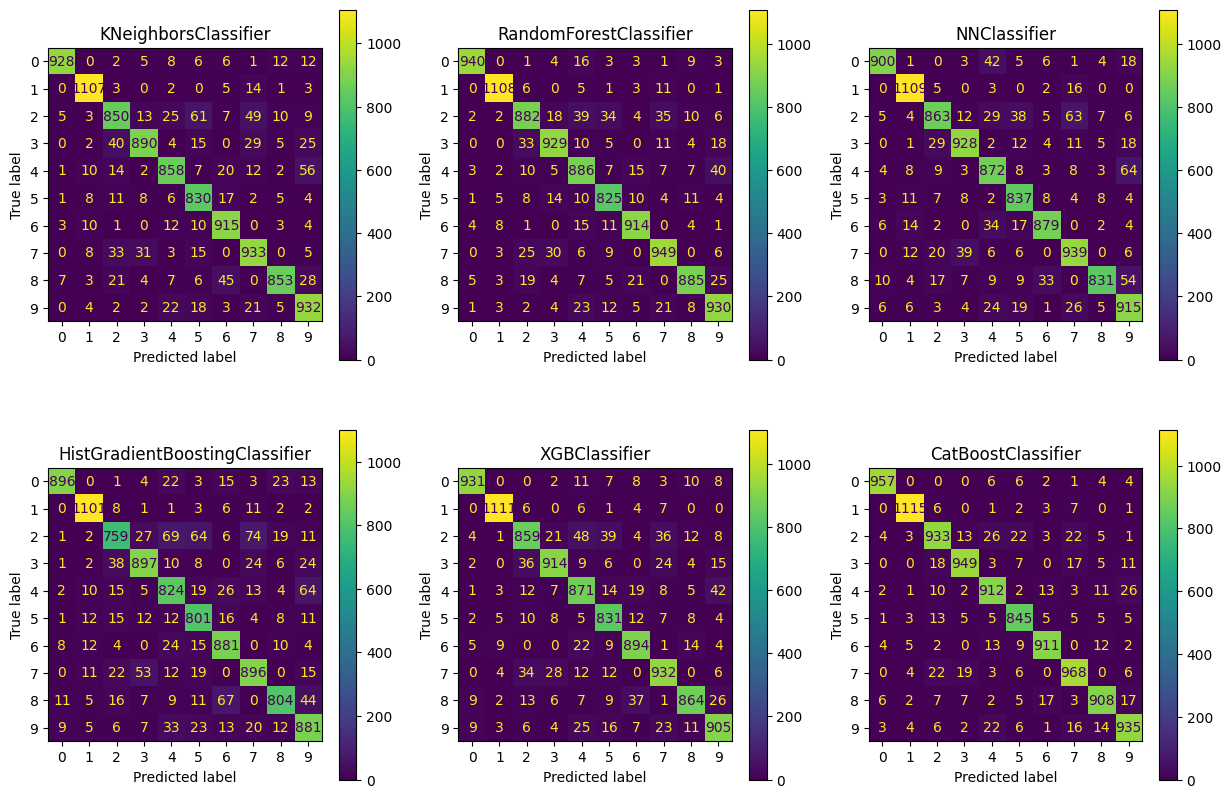

In [43]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)